#Segmentation of colorful fishes in the ocean

This applied course is inspired by specifications received by our research team a few years ago. It was a request from the Oceanographic Museum of Monaco who wanted to be able to perform augmented reality on their aquariums in order to display in real time the name of the fish species when it was visible to visitors. It will not be a question here of responding to these specifications because the recognition of fish species is a subject still in the research stage, but we are going to realize a software solution allowing to segment an image of the seabed containing a fish and isolate the seabed and the fish by displaying them in two different colors.

![Meduse.jpg](https://drive.google.com/uc?id=10INKF4edvoz7bl1s2UCdnMj-xj1KD9OO
)


#PART B - Image Segmentation

In [1]:
!git clone https://gitlab-student.centralesupelec.fr/Catherine.Soladie/imagesegmentation.git

Cloning into 'imagesegmentation'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), 1.02 MiB | 1.66 MiB/s, done.


In computer vision, <b>image segmentation</b> is the process of partitioning a digital image into multiple sets of pixels.

There exists many algorithms for image segmentation. Some are based on the RGB color only. Some others uses information on pixel proximity. More recently, deep learning methods have appeared for image segmentation. 



# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">3.1 Image Segmentation by thresholding</span>

We first plot the original image via matplotlib. As we open the image using openCV, we need to switch the 2 first components. We also add a black and a white pixel to be sure of what we see :).

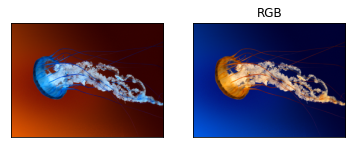

(Text(0.5, 1.0, 'RGB'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

# Read and plot the image
img_color = cv2.imread('/content/imagesegmentation/Meduse.jpg',cv2.IMREAD_COLOR)
plt.subplot(121),plt.imshow(img_color)
plt.title(''), plt.xticks([]), plt.yticks([])

# Add a white and a black pixel (just in case... :) 
img_color[0,0,:]=[0,0,0] # premier pixel noir
img_color[0,1,:]=[255,255,255] # second pixel blanc

# Swap R and B components and plot the image
img = deepcopy(img_color)
img[:,:,0] = img_color[:,:,2]
img[:,:,2] = img_color[:,:,0]
plt.subplot(122),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([]),plt.show()


We can find the RGB thresholds to distinguish the jellyfish from the ocean. To do that, we can print some pixels values, and visualise the 3 histograms (one for each on the RGB component).

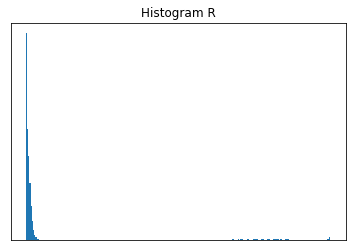

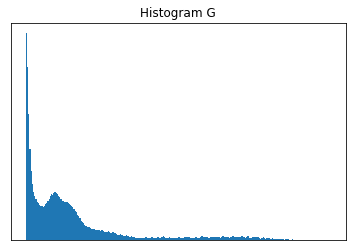

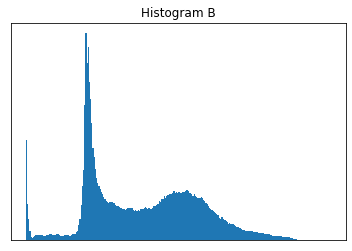

blue : 
[  1  37 123]
dark blue : 
[ 0  2 53]
orange : 
[254 221 168]
dark orange : 
[166  67   0]
red : 
[118  46  21]


In [3]:
# Plot the 3 histograms
plt.subplot(111),plt.hist(img[:,:,0].ravel(), bins=256);
plt.title('Histogram R'), plt.xticks([]), plt.yticks([]),plt.show()
plt.subplot(111),plt.hist(img[:,:,1].ravel(), bins=256);
plt.title('Histogram G'), plt.xticks([]), plt.yticks([]),plt.show()
plt.subplot(111),plt.hist(img[:,:,2].ravel(), bins=256);
plt.title('Histogram B'), plt.xticks([]), plt.yticks([]),plt.show()

# Plot some pixels
print('blue : ' )
print(img[55, 63])
print('dark blue : ' )
print(img[82, 939])
print('orange : ' )
print(img[356, 318])
print('dark orange : ' )
print(img[276, 212])
print('red : ' )
print(img[449, 438])


From those informations, we can find some thresholds taht can be use to get the jellyfish from the sea. Try to find on your own thresholds. 
You can use <a href="https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981"><b>cv2.inRange</b></a> function to create a mask and visualize it.

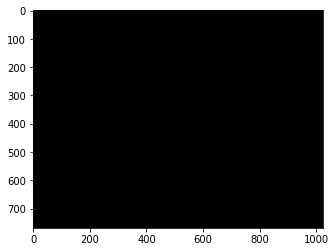

In [4]:
# TODO: it is your turn!!! Find one or sereval masks and visualize them
# Create a mask
lower = np.array([0,0,0]) # TODO modify the lower and upper values for the mask
upper = np.array([255,255,255]) # TODO modify the lower and upper values for the mask
mask = cv2.inRange(img, lower, upper)

#apply the mask on the image
plt.imshow(mask,cmap='gray')

# Add more masks if needed
#TODO

Below is one solution. 
As you can notice on the previous data, all the blue values of the ocean have a low R component, and all of the jellyfish values have a high R component. That is why we chose to focus on the R component (1st component) only. We can find the threshold by looking at the histogram of the R values. Values between 0 and 10 are considered as ocean (blue), whatever the values of G and B components.

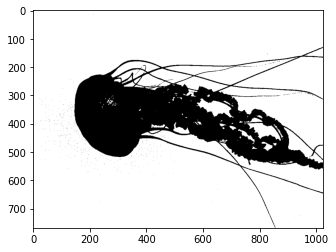

In [5]:
# Create a mask
lower_ocean = np.array([0,0,0])
upper_ocean = np.array([10,255,255])
mask = cv2.inRange(img, lower_ocean, upper_ocean)
plt.imshow(mask,cmap='gray')

We can apply this mask on the original image to get the jellyfish "out of the ocean".

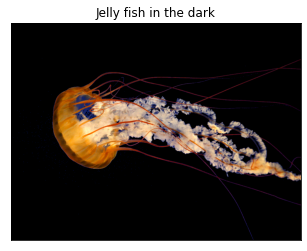

(Text(0.5, 1.0, 'Jelly fish in the dark'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= cv2.bitwise_not(mask))  # Precisa colocar o not, porque o AND no preto (0,0,0) iria esconder a agua viva, fazendo o efeito oposto

# Affichage des images
plt.subplot(111),plt.imshow(res)
plt.title('Jelly fish in the dark'), plt.xticks([]), plt.yticks([]),plt.show()

What is the main problem of this solution?

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">3.2 Image segmentation using k-means on the color</span>

Finding thresholds can be difficult. It can also be fastidious when the values of the thresholds can change from one image to another, which is often the case with real data.

An automated solution (such as k-means) can solve this problem.

Apply k-means algorithm on several images to illustrate the previous assertion.

We first read one image and convert it to fit the input of <a href="https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88">k-means openCV function</a>.

In [6]:
# Read one image and convert it to fit input of k-means openCV data format.

img_tmp = cv2.imread("/content/imagesegmentation/Meduse.jpg", cv2.IMREAD_COLOR)
#img_tmp = cv2.imread("/content/imagesegmentation/yellow-fish.jpg", cv2.IMREAD_COLOR)
img = deepcopy(img_tmp)
img[:,:,0] = img_tmp[:,:,2]
img[:,:,2] = img_tmp[:,:,0]
img_reshaped = img
Z = img_reshaped.reshape((-1,3))
Z = np.float32(Z) # convert to np.float32

In [7]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(center)

[[  5.092968  23.00427   97.05962 ]
 [189.86081  142.69044   99.80811 ]]


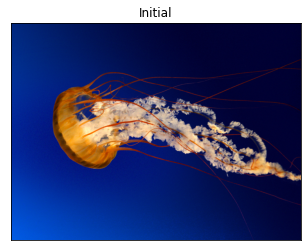

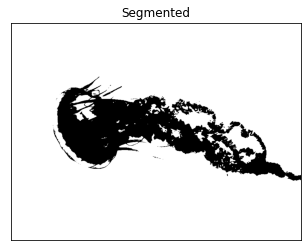

(Text(0.5, 1.0, 'Segmented'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [8]:
# Now convert back into uint8, and make original image
center = [[255, 255, 255], [0, 0, 0] ] # are the new values for each of the clusters
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure()
plt.subplot(111),plt.imshow(img)
plt.title('Initial'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(res2)
plt.title('Segmented'), plt.xticks([]), plt.yticks([]),plt.show()


If you run sereval times the k-means algorithm, you can notice that you may have the fish in black for some runs or in white in other runs. This is due to the clustering algorithm (which is not a supervised algorithm). We get several clusters but no labels for them. To say it differently, we do not know what is the fish, and what is the ocean :).

Now, change the code to run it on another image (for instance yellow-fish.jpg). What can you observe?

[[ 89.70949   75.81031   95.34605 ]
 [210.79558  189.95905   10.053928]]


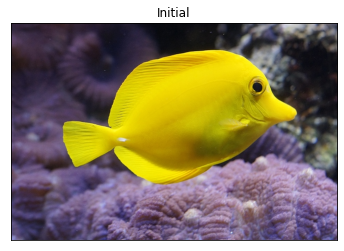

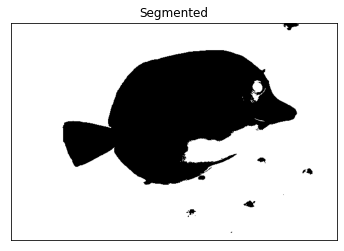

(Text(0.5, 1.0, 'Segmented'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [9]:
# TODO apply on yellow-fish.jpg
# Read one image and convert it to fit input of k-means openCV data format.

img_tmp = cv2.imread("/content/imagesegmentation/yellow-fish.jpg", cv2.IMREAD_COLOR)
img = deepcopy(img_tmp)
img[:,:,0] = img_tmp[:,:,2]
img[:,:,2] = img_tmp[:,:,0]
img_reshaped = img
Z = img_reshaped.reshape((-1,3))
Z = np.float32(Z) # convert to np.float32

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(center)

# Now convert back into uint8, and make original image
center = [[255, 255, 255], [0, 0, 0] ] # are the new values for each of the clusters
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure()
plt.subplot(111),plt.imshow(img)
plt.title('Initial'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(res2)
plt.title('Segmented'), plt.xticks([]), plt.yticks([]),plt.show()

You can also try with more than 2 clusters. 

In [14]:
# TODO try with more clusters


 If you have trouble with coding, see an example below.

[[ 56.651913   46.639606   58.470604 ]
 [138.21799   118.94551   149.7812   ]
 [210.30067   189.1828      6.4729514]]


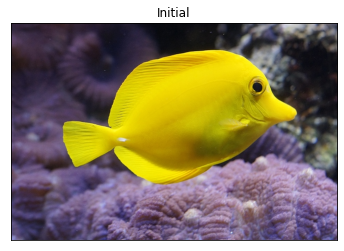

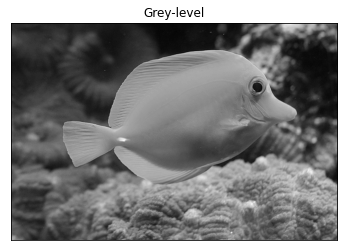

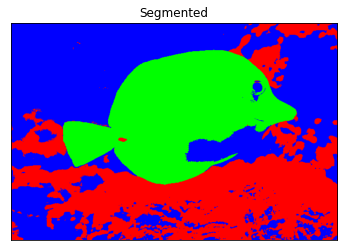

(Text(0.5, 1.0, 'Segmented'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [13]:
# Read one image and convert it to fit input of k-means openCV data format.

img_tmp = cv2.imread("/content/imagesegmentation/yellow-fish.jpg", cv2.IMREAD_COLOR)
#img_tmp = cv2.imread("/content/imagesegmentation/parrotFish.jpg", cv2.IMREAD_COLOR)
img = deepcopy(img_tmp)
img[:,:,0] = img_tmp[:,:,2]
img[:,:,2] = img_tmp[:,:,0]
img_reshaped = img
Z = img_reshaped.reshape((-1,3))
Z = np.float32(Z) # convert to np.float32

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(center)

# Now convert back into uint8, and make original image
center = [[0, 0, 255], [255, 0, 0] , [0, 255, 0]] # are the new values for each of the clusters
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure()
plt.subplot(111),plt.imshow(img)
plt.title('Initial'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap = 'gray')
plt.title('Grey-level'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(res2)
plt.title('Segmented'), plt.xticks([]), plt.yticks([]),plt.show()

What is missing in this approach?

<blockquote>
One answer may be: spatial information is not taken into account.</blockquote>

# 3.3 Another Use Case: Histopathology

Histopathology is the diagnosis and study of diseases of the tissues, and involves examining tissues and/or cells under a microscope.

The image histopathology.jpg can be analysed by k-means on the color, in order to automatically find the various parts of the tissue (kernel of a cell, ...).

[[154.72261  95.84804 152.20105]
 [212.70471 157.21783 195.23227]
 [248.77118 218.8692  228.60121]]


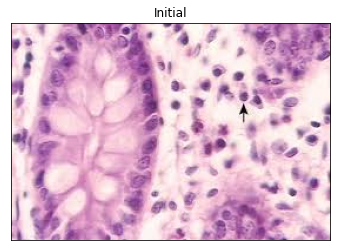

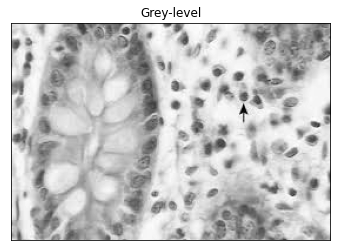

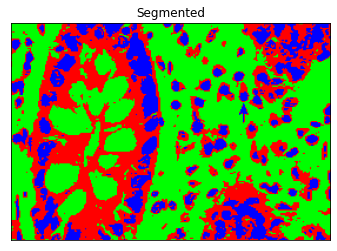

(Text(0.5, 1.0, 'Segmented'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [15]:
# Read one image and convert it to fit input of k-means openCV data format.

img_tmp = cv2.imread("/content/imagesegmentation/histopathology.jpg", cv2.IMREAD_COLOR)
img = deepcopy(img_tmp)
img[:,:,0] = img_tmp[:,:,2]
img[:,:,2] = img_tmp[:,:,0]
img_reshaped = img
Z = img_reshaped.reshape((-1,3))
Z = np.float32(Z) # convert to np.float32

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(center)

# Now convert back into uint8, and make original image
center = [[0, 0, 255], [255, 0, 0] , [0, 255, 0]] # are the new values for each of the clusters
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure()
plt.subplot(111),plt.imshow(img)
plt.title('Initial'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap = 'gray')
plt.title('Grey-level'), plt.xticks([]), plt.yticks([])  , plt.show()
plt.subplot(111),plt.imshow(res2)
plt.title('Segmented'), plt.xticks([]), plt.yticks([]),plt.show()